In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 3 notebook

In [4]:
## Load posterior mean dataframe
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))
print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))
print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 3A: Dependence of intermeal interval on stomach fullness at meal termination (show data and model?)

In [3]:
reload(plots)
reload(helpers)

fig, axes = plots.IMI_curve(group_dict, num_points=10, num_resamples=100)
plt.show()

KeyboardInterrupt: 

## Figure 3B: Comparison between single-meal intake and stomach fullness at meal termination

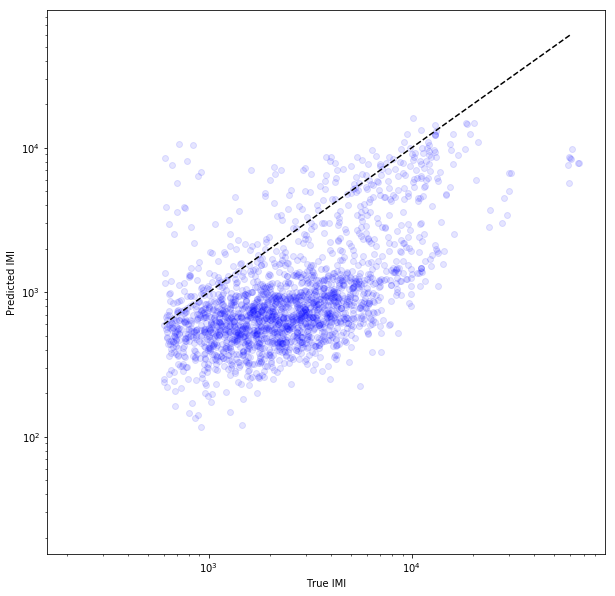

In [12]:
reload(plots)
reload(helpers)

#fig, axes = plots.IMI_prediction(df, num_samples=100, cutoff=1200)
fig, axes = plots.IMI_prediction_KDEmax(df, num_samples=1000, cutoff=600)
"""
fig, axes = plots.predict_IMI_full_post(df, 
                                        data_dict,
                                        num_resamples=1, 
                                        cutoff=600)
"""
#fig, axes = plots.IMI_fullness(df, cutoff=600)
plt.show()

## Figure 3C: Comparison between predicted and true intermeal interval using group satiety ratio, group posterior, and individual posterior data

In [ ]:
reload(plots)
reload(helpers)

fig, axes = plots.intake_fullness(df, cutoff=300)
plt.show()

## Figure 3D/E: Individual posterior mean values of stomach dependent and stomach independent intermeal interval parameters coloured by (D) treatment group and (E) normalised food intake

In [ ]:
reload(plots)
reload(helpers)

fig, axes = plots.pairplot(df, 'theta7', 'theta8', ctype='drug_c')
fig2, axes2 = plots.pairplot(df, 'theta7', 'theta8', ctype='rate_c')
plt.show()